1) Почему такой странный метод заполнения пропусков?

2) Кодирование категориальных признаков это не нормализация, фактически этап нормализации (масшатбирования признаков в общем случае) отсутствует

3) Для кодирования признаков тоже есть функции в склерн, не обязательно под это отдельный словарь заводить 

4) Почему выбрал именно СВМ с линейным ядром?

5) Как так вышло, что у тебя AUC на тесте 0.96, но при этом на всем датасете результаты близки к случайным? (спойлер: скорее всего в неправильном порядке объеденил столбец Таргет2 сначала трейн потом тест должно быть)

# To do
## Предсказывать колонку Target

1) Заполнить пропуски в датасете

2) Нормализовать те колонки, которые нужно (сочтешь необходимым)

3) Визуализировать данные (бонус: попробовать понижение размерности PCA, T-SNE) понизить до 2Д и отобразить на графике, цветом пометить классы

4) Попробовать разные модели МЛ и подобрать метрику по которой будешь сравнивать


5) Сделать выводы, представить результаты


*Метрики: Accuracy, Recall, F1, AUC*


# Done 
1 - Заполнение пропусков в датасете

    a - удалил дубликаты
    
    b - удалил " пустые " строки
    
    с - заменил в  AvgPrice,  MinPrice,  PremiumInCart пустые элементы на предыдущие значения
    
 ##### Итог: 
 
    было 23254, стало 15893 строк
    
#dataset.isnull().sum()
#len(dataset)


2 - Нормализация:

    a - были нормализована колонка с DeviceCategory. ( Заменяем в столбце DeviceCategory tablet, desktop и mobile на 2, 1 и 0 )
    
    
3 - Визуализация:

    а - 

## Information
PremiumPDPPercentage - процент премиума PDP - Partial Dependence Plots

PremiumCategoryPagePercentage - премиум страница в процентах

FilteredBrand - 

PremiumInCart - индикатор наличия в корзине премиального продукта

PDPContain35 - 

## Count null in data
AvgPrice - 1886 - средняя цена  просмотренных продуктов

MinPrice - 1886 - мин цена просмотренных продуктов

PremiumInCart - 1526 - индикатор наличия в корзине премиального продукта


### For T-SNE 

~Чтобы отображал~

*import plotly.io as pio*


*pio.renderers.default = 'iframe'*

In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
import numpy as np
import pandas
from sklearn.impute import KNNImputer
from pandas import read_csv
import csv
dataset = read_csv('/content/drive/MyDrive/tasks for data/data_premium/premium_20220101_20220131_with_nulls_device.csv')
dataset.head(10)

,DeviceCategory,PremiumPDPPercentage,PremiumCategoryPagePercentage,FilteredBrand,AvgPrice,MinPrice,PremiumInCart,PDPContain35,Target
0,mobile,0.222222,0.000000,0,109.718750,73.0,0.0,0,0
1,desktop,0.000000,0.000000,0,45.600000,45.6,0.0,1,0
2,mobile,1.000000,0.000000,0,223.000000,223.0,1.0,0,1
3,desktop,0.150000,0.363636,0,69.100000,39.6,0.0,0,0
4,desktop,1.000000,0.000000,0,342.000000,342.0,1.0,0,1
5,mobile,0.750000,0.000000,0,290.600000,192.0,1.0,1,1
6,desktop,0.000000,0.000000,0,37.200000,37.2,0.0,0,0
7,desktop,0.428571,0.000000,0,117.500000,116.0,NaN,0,0
8,desktop,1.000000,0.000000,0,208.000000,208.0,1.0,0,1
9,mobile,1.000000,0.375000,18,161.189474,70.8,1.0,1,1


# Основная работа 

In [122]:

import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer
from IPython.display import display


df = pd.read_csv('/content/drive/MyDrive/tasks for data/data_premium/premium_20220101_20220131_with_nulls_device.csv')


## Удаляем строку, если кол-во пустых элементов больше 2

In [123]:
df.dropna(axis=0,inplace=True, thresh = 2)

## Удаляем дубликаты

In [124]:
df = pd.DataFrame(df.drop_duplicates().reset_index(drop=True))

## Заменяем пустые элементы предыдущим элементом

In [125]:
# imputer = KNNImputer(n_neighbors=3, weights="uniform")
# df[["PremiumInCart"]] = df[["PremiumInCart"]].fillna(method = "ffill")
# df[["AvgPrice"]] = df[["AvgPrice"]].fillna(method = "ffill")
# df[["MinPrice"]] = df[["MinPrice"]].fillna(method = "ffill")


#Заменяем пустые элементы средним\медианным знач

In [126]:
# from sklearn.impute import SimpleImputer
# imp_mean = SimpleImputer( strategy='median') # для импутации медианой замените 'mean' на 'median'
# imp_mean.fit(df[["PremiumInCart"]])
# df[["PremiumInCart"]] = imp_mean.transform(df[["PremiumInCart"]])
# df.head(10)

#Заменяем пустые элементы самым частым значением

In [127]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent') # для импутации медианой замените 'mean' на 'median'
imp_mean.fit(df[["PremiumInCart"]])
df[["PremiumInCart"]] = imp_mean.transform(df[["PremiumInCart"]])

imp_mean = SimpleImputer( strategy='most_frequent') # для импутации медианой замените 'mean' на 'median'
imp_mean.fit(df[["AvgPrice"]])
df[["AvgPrice"]] = imp_mean.transform(df[["AvgPrice"]])

imp_mean = SimpleImputer( strategy='most_frequent') # для импутации медианой замените 'mean' на 'median'
imp_mean.fit(df[["MinPrice"]])
df[["MinPrice"]] = imp_mean.transform(df[["MinPrice"]])
df.head(10)

,DeviceCategory,PremiumPDPPercentage,PremiumCategoryPagePercentage,FilteredBrand,AvgPrice,MinPrice,PremiumInCart,PDPContain35,Target
0,mobile,0.222222,0.000000,0,109.718750,73.0,0.0,0,0
1,desktop,0.000000,0.000000,0,45.600000,45.6,0.0,1,0
2,mobile,1.000000,0.000000,0,223.000000,223.0,1.0,0,1
3,desktop,0.150000,0.363636,0,69.100000,39.6,0.0,0,0
4,desktop,1.000000,0.000000,0,342.000000,342.0,1.0,0,1
5,mobile,0.750000,0.000000,0,290.600000,192.0,1.0,1,1
6,desktop,0.000000,0.000000,0,37.200000,37.2,0.0,0,0
7,desktop,0.428571,0.000000,0,117.500000,116.0,0.0,0,0
8,desktop,1.000000,0.000000,0,208.000000,208.0,1.0,0,1
9,mobile,1.000000,0.375000,18,161.189474,70.8,1.0,1,1


## Заменяем в столбце DeviceCategory tablet, desktop и mobile на 2, 1 и 0

In [128]:
test = {'tablet' : 2, 'desktop': 1,'mobile': 0 }
df["DeviceCategory"] = df["DeviceCategory"].map(test)


#Нормализируем категории  AvgPrice и MinPrice

In [129]:
from sklearn import preprocessing

min_max_Scalar = preprocessing.MinMaxScaler()
df_2 = df[["AvgPrice","MinPrice"]]
col = df_2.columns
result = min_max_Scalar.fit_transform(df_2)
df_2 = pd.DataFrame(result, columns=col)
df[["AvgPrice","MinPrice"]] = df_2[["AvgPrice","MinPrice"]]
df.head(5)

,DeviceCategory,PremiumPDPPercentage,PremiumCategoryPagePercentage,FilteredBrand,AvgPrice,MinPrice,PremiumInCart,PDPContain35,Target
0,0,0.222222,0.000000,0,0.152564,0.107487,0.0,0,0
1,1,0.000000,0.000000,0,0.060901,0.066864,0.0,1,0
2,0,1.000000,0.000000,0,0.314510,0.329874,1.0,0,1
3,1,0.150000,0.363636,0,0.094496,0.057969,0.0,0,0
4,1,1.000000,0.000000,0,0.484632,0.506301,1.0,0,1


## Разделяем нашу выборка на тренировочную и тестовую

In [130]:
from sklearn.model_selection import train_test_split

columns_target = ["Target"]  # целевая выборка
columns_train = ["DeviceCategory", "PremiumPDPPercentage", "PremiumCategoryPagePercentage", "FilteredBrand", "AvgPrice", "MinPrice", "PremiumInCart", "PDPContain35" ]

X = df[columns_train]
Y = df[columns_target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


## Загружаем  модель Support Vector Machine для обучения

In [131]:
from sklearn import svm

In [132]:
predmodel = svm.LinearSVC()

## Обучаем модель с помощью нашей обучаемой выборки

In [133]:
predmodel.fit(X_train, Y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

## Предсказываем на тестовой выборке

In [134]:
z = predmodel.predict(X_test)

## Объединяем для колонки Target2

In [135]:
# z = predmodel.predict(X_train)
# zz = predmodel.predict(X_test)
# df["Target2"] = pd.Series(zz)
# df["Target2"][5245:] = pd.Series(z)
# df.head(10)

In [136]:
z = predmodel.predict(X_train)
zz = predmodel.predict(X_test)
df["Target2"] = pd.Series(z)
df["Target2"][10648:] = pd.Series(zz)
df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,DeviceCategory,PremiumPDPPercentage,PremiumCategoryPagePercentage,FilteredBrand,AvgPrice,MinPrice,PremiumInCart,PDPContain35,Target,Target2
0,0,0.222222,0.000000,0,0.152564,0.107487,0.0,0,0,1.0
1,1,0.000000,0.000000,0,0.060901,0.066864,0.0,1,0,1.0
2,0,1.000000,0.000000,0,0.314510,0.329874,1.0,0,1,0.0
3,1,0.150000,0.363636,0,0.094496,0.057969,0.0,0,0,0.0
4,1,1.000000,0.000000,0,0.484632,0.506301,1.0,0,1,0.0
5,0,0.750000,0.000000,0,0.411151,0.283914,1.0,1,1,0.0
6,1,0.000000,0.000000,0,0.048892,0.054411,0.0,0,0,0.0
7,1,0.428571,0.000000,0,0.163688,0.171238,0.0,0,0,0.0
8,1,1.000000,0.000000,0,0.293066,0.307635,1.0,0,1,1.0
9,0,1.000000,0.375000,18,0.226146,0.104225,1.0,1,1,0.0


## Проверяем точность предсказаний

In [137]:
predmodel.score(X_test, Y_test)

0.9612964728312678

## Пытаемся "рисовать"

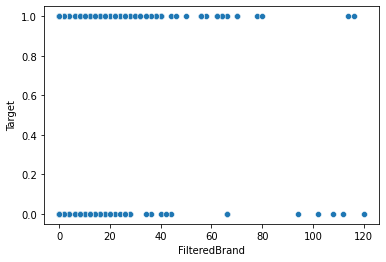

In [138]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.scatterplot(x='FilteredBrand', y=df['Target'], data=X_test)

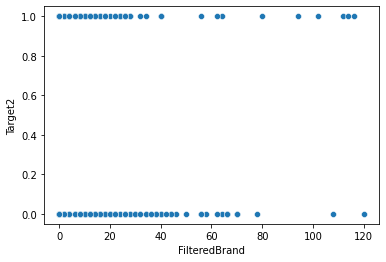

In [139]:
sns.scatterplot(x='FilteredBrand', y=df['Target2'],palette='hls', data=X_test)

# Используя понижение размерности PCA пробуем рисовать с учетом Target и Target2
*https://www.machinelearningmastery.ru/pca-using-python-scikit-learn-e653f8989e60/*

## For Target

In [140]:
from sklearn.preprocessing import StandardScaler
features = ['DeviceCategory', 'PremiumPDPPercentage', 'PremiumCategoryPagePercentage', 'FilteredBrand', 'AvgPrice', 'MinPrice', 'PremiumInCart', 'PDPContain35']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Target']]], axis = 1)
finalDf

,principal component 1,principal component 2,Target
0,-0.015332,0.351278,0
1,-1.651561,-0.544372,0
2,3.972727,-0.349723,1
3,-0.366440,-0.374624,0
4,5.858961,-1.938184,1
...,...,...,...
15888,1.146272,0.383747,0
15889,-1.665638,-0.536282,0
15890,-0.590626,-0.869068,0
15891,-1.436688,0.756488,0


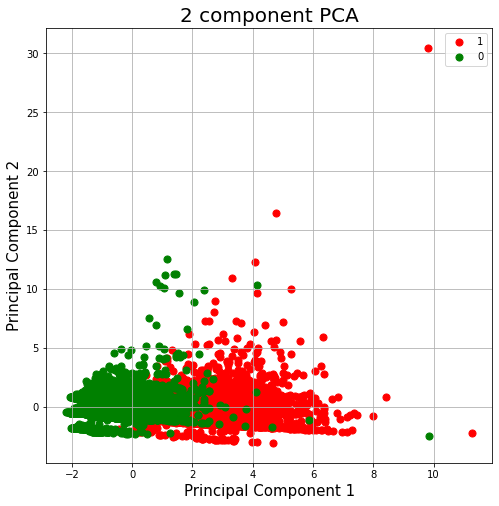

In [141]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

## For Target2

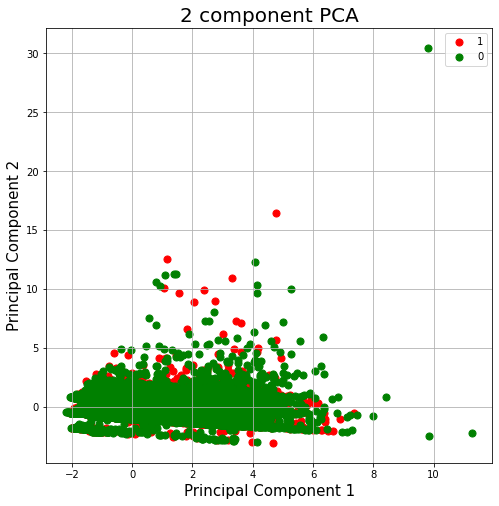

In [142]:
from sklearn.preprocessing import StandardScaler
features = ['DeviceCategory', 'PremiumPDPPercentage', 'PremiumCategoryPagePercentage', 'FilteredBrand', 'AvgPrice', 'MinPrice', 'PremiumInCart', 'PDPContain35']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Target2']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Target2']]], axis = 1)
finalDf

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target2'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

# Метрики

- Accuracy - доля правильных ответов алгоритма

- Precision - точность

- Recail - полнота

- F1 - среднее гармоническое precision и recall

- AUC


![image.png](attachment:1abe0f0a-9613-4b10-b47d-2260aca9369c.png)


## Accuracy

![image.png](attachment:009ac49b-bd57-4048-bda7-2abb2cbbd075.png)

## Precision and Recail

![image.png](attachment:3bef9fd9-1f35-43db-9f97-a2dba3fbd35f.png)

 ## Accuracy


In [143]:
import sklearn.metrics
acc = sklearn.metrics.accuracy_score(df["Target"], df["Target2"], normalize=False)
acc/len(df["Target"])

0.5735229346253068

## Precision_score

In [144]:
precision = sklearn.metrics.precision_score(df["Target"], df["Target2"], pos_label=1)
precision

0.3071753310931014

## Recall

In [145]:
recall = sklearn.metrics.recall_score(df["Target"], df["Target2"], pos_label=1)
recall

0.3219390926041019

## Выводим все одной функцией

In [146]:
from sklearn.metrics import classification_report

print(classification_report(df["Target"], df["Target2"], target_names = ['0', '1']))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69     11066
           1       0.31      0.32      0.31      4827

    accuracy                           0.57     15893
   macro avg       0.50      0.50      0.50     15893
weighted avg       0.58      0.57      0.58     15893



# Рассчитываем ROC AUC

LogisticRegression: ROC AUC=0.959


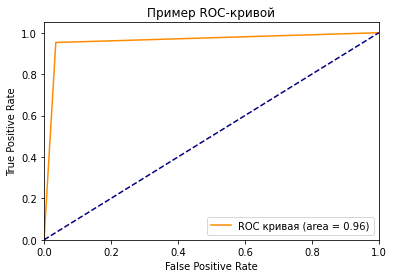

In [147]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt


# получаем предказания
lr_probs = predmodel.predict(X_test)



# рассчитываем ROC AUC
lr_auc = roc_auc_score(Y_test, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(Y_test, lr_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

# Выводы
